#### Представьте, что вы работаете дата-аналитиком в крупном инвестфонде. Вам дали данные по выручке и стоимости акций крупных компаний за 2019–2024 гг., а также предоставили динамику изменения стоимости самых популярных полезных ископаемых.
Ваша задача — провести первичный анализ имеющихся данных и построить несколько визуализаций:
* График изменения стоимости крипты с помощью Pandas.
* Двойной график изменения стоимости, в котором отражены значения динамики в абсолютных (как в датасете) и относительные (в сравнении с предыдущими значениями).
* График суммы всех параметров и каждого параметра в отдельности.
* Интерактивный график, показывающий изменение каждого параметра.
* Множественные диаграммы рассеивания для работы нескольких моделей регрессии.

Подробнее со структурой датасета можно познакомиться в статье 2019–2024 US Stock Market Data. https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data

In [1]:
# Импортируем библиотеки, которые будем использовать в рамках работы
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
df.shape

(1243, 38)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(3)

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,Ethereum_Price,Ethereum_Vol.,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Silver_Price,Silver_Vol.,Google_Price,Google_Vol.,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,NaN,"2,309.28",246890.0,"4,958.61","17,642.73",315620000.0,185.85,102550000.0,187.91,110610000.0,411.22,28260000.0,22.796,NaN,142.38,62500000.0,661.60,47660000.0,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,NaN,"2,304.28",323610.0,"4,906.19","17,344.71",240640000.0,186.86,53490000.0,188.86,90680000.0,403.78,29230000.0,23.236,85160.0,141.16,37120000.0,630.27,36020000.0,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,NaN,"2,283.14",408790.0,"4,848.87","17,137.24",366450000.0,184.40,54830000.0,187.29,102270000.0,397.58,46780000.0,23.169,66910.0,140.10,71370000.0,615.27,45070000.0,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0


### Задание 1 (2 балла)
Посмотрите на тип данных столбца с датами. Преобразуйте текущий тип данных в формат pandas.Timestamp. С помощью функционала библиотеки Pandas создайте линейные графики динамики стоимости Bitcoin и Ethereum с января 2019 года по декабрь 2021 года.

In [5]:
cripta = df[['Date', 'Bitcoin_Price', 'Ethereum_Price']]
cripta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1242
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1243 non-null   object
 1   Bitcoin_Price   1243 non-null   object
 2   Ethereum_Price  1243 non-null   object
dtypes: object(3)
memory usage: 38.8+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Bitcoin_Price'] = df['Bitcoin_Price'].str.replace(',', '').astype(float)
df['Ethereum_Price'] = df['Ethereum_Price'].str.replace(',', '').astype(float)
cripta = df[['Date', 'Bitcoin_Price', 'Ethereum_Price']]

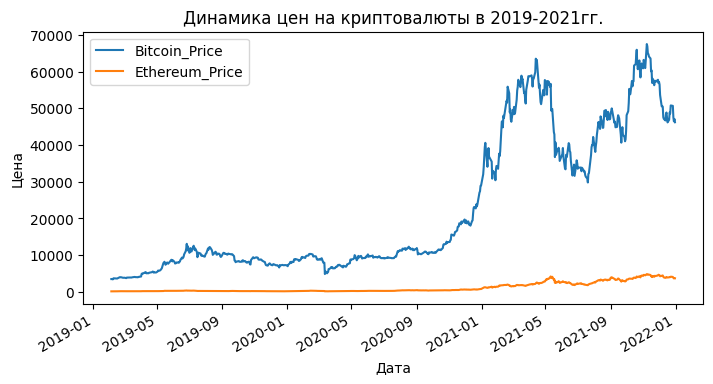

In [7]:
cripta[(cripta['Date'] >= '2019-01-01') & (cripta['Date'] <= '2021-12-31')].plot(kind='line', x='Date', y=['Bitcoin_Price', 'Ethereum_Price'], figsize=(8, 4))
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('Динамика цен на криптовалюты в 2019-2021гг.')
plt.show()

### Задание 2 (2 балла)
Создайте один график, на котором будет изображена динамика цен на все полезные ископаемые в 2019–2024 гг. (Natural Gas, Crude Oil, Copper, Platinum, Gold). Цены рассчитайте относительно 4 февраля 2019 года (цены в этот день возьмите за 1, остальные рассчитайте как отношение цены в заданный день к цене 4 февраля 2019 года).

In [8]:
df['Platinum_Price'] = df['Platinum_Price'].str.replace(',', '').astype(float)
df['Gold_Price'] = df['Gold_Price'].str.replace(',', '').astype(float)
fossil = df[['Date', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Silver_Price', 'Gold_Price']].set_index('Date')

In [9]:
# Цены рассчитайте относительно 4 февраля 2019 года (цены в этот день возьмите за 1, остальные рассчитайте как отношение цены в заданный день к цене 4 февраля 2019 года).
def relative_price(df):
    for column in df.columns:
        df[column] = df[column] / df.loc['2019-02-04', column]
    return df

fossil.pipe(relative_price)

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price
Date,,,,,,
2024-02-02,0.781579,1.324780,1.366041,1.096170,1.434974,1.556659
2024-02-01,0.770677,1.353006,1.377480,1.121337,1.462672,1.569848
2024-01-31,0.789474,1.390213,1.396247,1.133860,1.458454,1.567043
2024-01-30,0.780827,1.426320,1.398034,1.132766,1.461979,1.554536
2024-01-29,0.936090,1.407258,1.386595,1.140790,1.456251,1.542409
...,...,...,...,...,...,...
2019-02-08,0.971053,0.966276,1.005898,0.975319,0.995153,0.999394
2019-02-07,0.959023,0.964809,1.012332,0.973617,0.989110,0.996134
2019-02-06,1.000752,0.989919,1.015192,0.981277,0.988355,0.996286


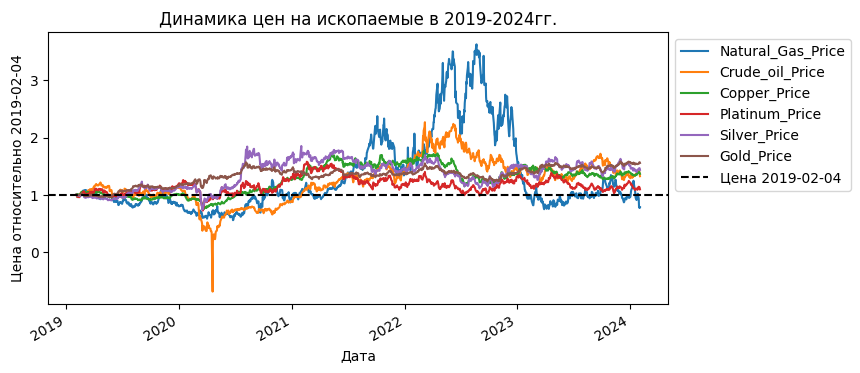

In [10]:
ax = fossil[fossil.index >= '2019-01-01'].plot(kind='line', figsize=(8, 4))
ax.axhline(y=1, color='black', linestyle='--', label='Цена 2019-02-04')
plt.xlabel('Дата')
plt.ylabel('Цена относительно 2019-02-04')
plt.title('Динамика цен на ископаемые в 2019-2024гг.')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

### Задание 3 (4 балла)
Среди всех IT-компаний явно выделяются пять наиболее крупных. Они объединены аббревиатурой FAANG — Meta (Former Facebook), Amazon, Apple, Netflix, Google. Многие программисты мечтают попасть именно в эти компании, а инвесторы пристально следят за их деятельностью. Давайте узнаем, насколько это оправданно.

In [11]:
df['S&P_500_Price'] = df['S&P_500_Price'].str.replace(',', '').astype(float)
df['Nasdaq_100_Price'] = df['Nasdaq_100_Price'].str.replace(',', '').astype(float)
it = df[['Date', 'Apple_Price', 'Google_Price','Netflix_Price', 'Amazon_Price', 'Meta_Price', 'S&P_500_Price', 'Nasdaq_100_Price']].set_index('Date')

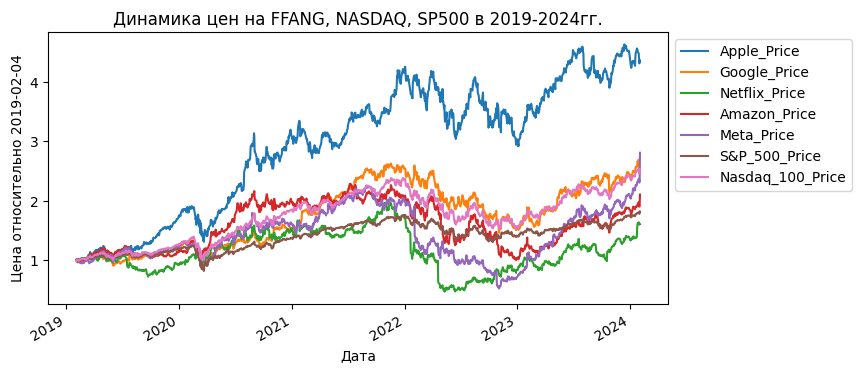

In [12]:
# Для того, чтобы понять, насколько хорошо растут акции FFANG, сравним динамику с 2мя интегральными индексами: S&P (крупнейшие традиционные компании) и NASDAQ (технологические компании)
# При таком сравнении получается, что бесспортным лидером является Apple. Google идет близко к Nasdaq, а вот остальные компании чувствовали себя хуже среднеотраслевого показателя.
# Кроме того, в некоторые периоды даже хуже традиционных отраслей.
# Отсюда можно сделать вывод, что стоит уделять больше внимания реальным показателям компаний, а не силе бренда.

it.pipe(relative_price).plot(kind='line', figsize=(8, 4))
plt.xlabel('Дата')
plt.ylabel('Цена относительно 2019-02-04')
plt.title('Динамика цен на FFANG, NASDAQ, SP500 в 2019-2024гг.')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

#### Задание 3.1 (1 балл)
Создайте функцию, которая будет принимать на вход произвольное количество столбцов формата pandas.Series и возвращать сумму этих серий.
С помощью метода .apply() создайте новый столбец FAANG, который будет представлять собой сумму стоимости акций всех компаний, входящих в это символическое объединение.

In [13]:
%%time

df['FAANG'] = df[['Apple_Price', 'Google_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']].sum(axis=1)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [14]:
%%time

def sum_series(*args):
    return pd.concat(args, axis=1).sum(axis=1)

df['FAANG'] = sum_series(df[['Apple_Price', 'Google_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']])

CPU times: total: 0 ns
Wall time: 0 ns


In [15]:
%%time

# apply имеет не лучшую производительность

def sum_series(*args):
    return sum(args)

df['FAANG'] = df[['Apple_Price', 'Google_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']].apply(lambda x: sum_series(*x), axis=1)

CPU times: total: 0 ns
Wall time: 1.26 ms


#### Задание 3.2 (1 балла)
Аналогично заданию 3.1 рассчитайте все стоимости акций компаний относительно стоимости 4 февраля 2019 года (возьмите это значение за единицу, остальные — как соотношение).

Создайте линейный график, на котором будут изображены все графики роста стоимости компаний (входящих в FAANG) относительно 4 февраля 2019 года.
Нанесите на график темпы роста всего FAANG. Те компании, которые росли быстрее (большую часть времени), чем в среднем росли показатели по FAANG, покрасьте в оттенки синего, а те компании, которые росли медленнее, — в оттенки красного.
Добавьте легенду и остальные аттрибуты.

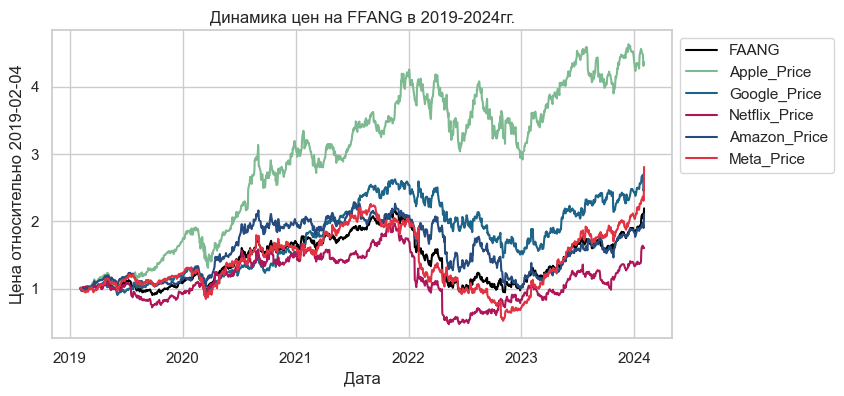

In [25]:
import random

faang = df[['Date', 'Apple_Price', 'Google_Price','Netflix_Price', 'Amazon_Price', 'Meta_Price', 'FAANG']].set_index('Date')
faang.pipe(relative_price)
plt.figure(figsize=(8, 4))
sns.lineplot(data=faang['FAANG'], label='FAANG', color='black')
for column in faang.drop(columns='FAANG').columns:
    if faang[column].mean() > faang['FAANG'].mean():
        sns.lineplot(data=faang[column], label=column, color=random.choice(sns.color_palette('crest')))
    else:
        sns.lineplot(data=faang[column], label=column, color=random.choice(sns.color_palette('rocket')))
plt.xlabel('Дата')
plt.ylabel('Цена относительно 2019-02-04')
plt.title('Динамика цен на FFANG в 2019-2024гг.')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

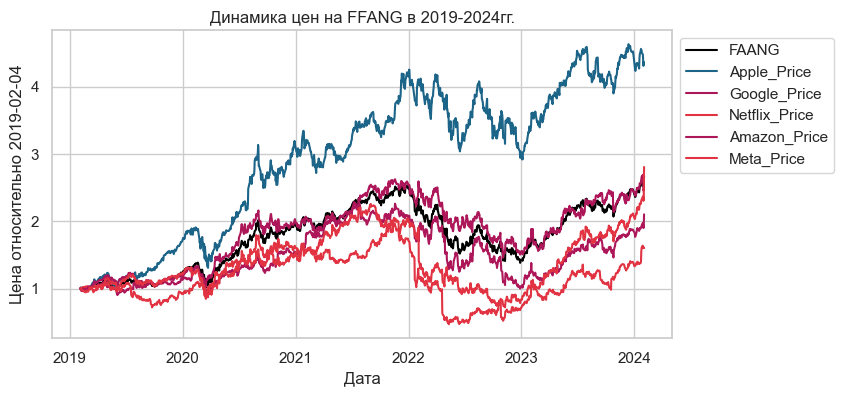

In [30]:
# Если честно, мне кажется построенный выше график не имеющим смысла, потому что абсолютные цены у разных компаний сильно отличаются, 
# это приводит к сильным искажениям в сторону более дорогих акций при суммировании их в столбце FAANG.
# Лучше построить 'FAANG' по относительным ценам, как среднюю показателей входящих в FAANG компаний.
# Тогда мы увидим иную картину: только Apple идет выше среднего роста, остальные имеют показатели ниже средней.

faang = df[['Date', 'Apple_Price', 'Google_Price','Netflix_Price', 'Amazon_Price', 'Meta_Price']].set_index('Date')
faang.pipe(relative_price)
faang['FAANG'] = faang.mean(axis=1)
plt.figure(figsize=(8, 4))
sns.lineplot(data=faang['FAANG'], label='FAANG', color='black')
for column in faang.drop(columns='FAANG').columns:
    if faang[column].mean() > faang['FAANG'].mean():
        sns.lineplot(data=faang[column], label=column, color=random.choice(sns.color_palette('crest')))
    else:
        sns.lineplot(data=faang[column], label=column, color=random.choice(sns.color_palette('rocket')))
plt.xlabel('Дата')
plt.ylabel('Цена относительно 2019-02-04')
plt.title('Динамика цен на FFANG в 2019-2024гг.')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

#### Задание 3.3 (2 балла)
Что выгоднее — инвестиции в полезные ископаемые или в крупные компании?

Создайте линейный график с двумя линиями. Первая линия отвечает за полезные ископаемые.
Рассчитайте стоимость всех полезных ископаемых в ценах относительно 4 февраля 2019 года. Возьмите это значение за 1, остальные цены получите как отношение к этой цене. Например, если за месяц цены выросли на 10%, то полученное значение равно 1.1.
Подсчитайте среднее по всем полезным ископаемым по дням и добавьте получившиеся значения на график.
Проделайте аналогичную процедуру для всех компаний в датасете. Получившийся средний рост стоимости акций добавьте на график.
На основании полученных результатов ответьте на вопрос: во что лучше инвестировать — в полезные ископаемые или акции компаний?

In [18]:
# С ценой на акции Berkshire_Price явно что-то не так, но поскольку мы в итоге все равно уйдем к относительной цене, будем надеяться, что цифры не терялись, просто неверно разметили разряды

df['Berkshire_Price'] = df['Berkshire_Price'].str.replace(',', '').astype(float)

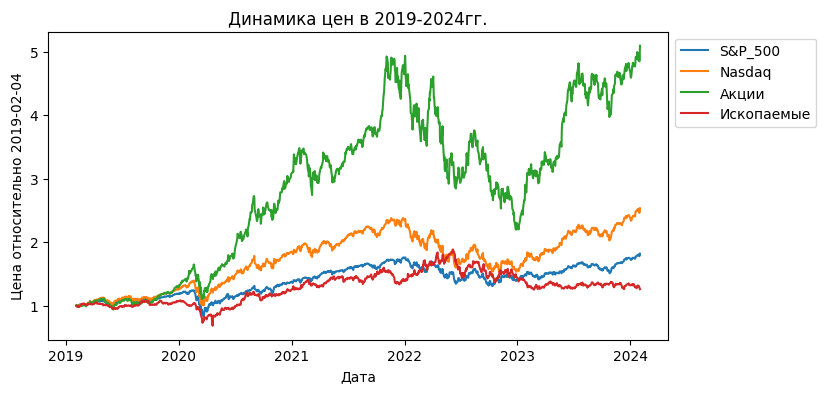

In [19]:
sp = df[['Date', 'S&P_500_Price']].set_index('Date')
sp.pipe(relative_price)
sp['SP'] = sp.mean(axis=1)

nasdaq = df[['Date', 'Nasdaq_100_Price']].set_index('Date')
nasdaq.pipe(relative_price)
nasdaq['Nasdaq'] = nasdaq.mean(axis=1)

companies = df[['Date', 'Apple_Price', 'Tesla_Price', 'Microsoft_Price',
       'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price',
       'Amazon_Price', 'Meta_Price']].set_index('Date')
companies.pipe(relative_price)
companies['CORP'] = companies.mean(axis=1)

fossil['FOSSILS'] = fossil.mean(axis=1)

plt.figure(figsize=(8, 4))
sns.lineplot(data=sp['SP'], label='S&P_500')
sns.lineplot(data=nasdaq['Nasdaq'], label='Nasdaq')
sns.lineplot(data=companies['CORP'], label='Акции')
sns.lineplot(data=fossil['FOSSILS'], label='Ископаемые')
plt.xlabel('Дата')
plt.ylabel('Цена относительно 2019-02-04')
plt.title('Динамика цен в 2019-2024гг.')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

*На график добавлены также индексы S&P 500 (500 крупнейших компаний) и NASDAQ 100 (100 крупнейших технологических компаний) для более адекватного анализа.*

*Можно сделать вывод, что хотя в целом акции являются более прибыльным вложением, чем ископаемые, бывают периоды, когда ископаемые растут в цене быстрее.*

*При этом технологические компании в общем растут быстрее, чем традиционные, а некоторые из них - настоящие чемпионы, демонстрирующие пятикратный рост (не все из них входят в FAANG).*

### Задание 4 (4 балла)
Попробуем использовать разные подходы для реализации одной задачи — визуализации волатильности акций разных компаний.

#### Задание 4.1 (2 балла)
С помощью библиотек matplotlib и seaborn создайте поле (plt.subplots()), в котором на графиках для каждой компании будет изображена динамика роста стоимости акций. Отметьте зеленым все компании, стоимость акций которых была в два раза выше на начало 2024 года в сравнении с ценой в начале 2019 года.

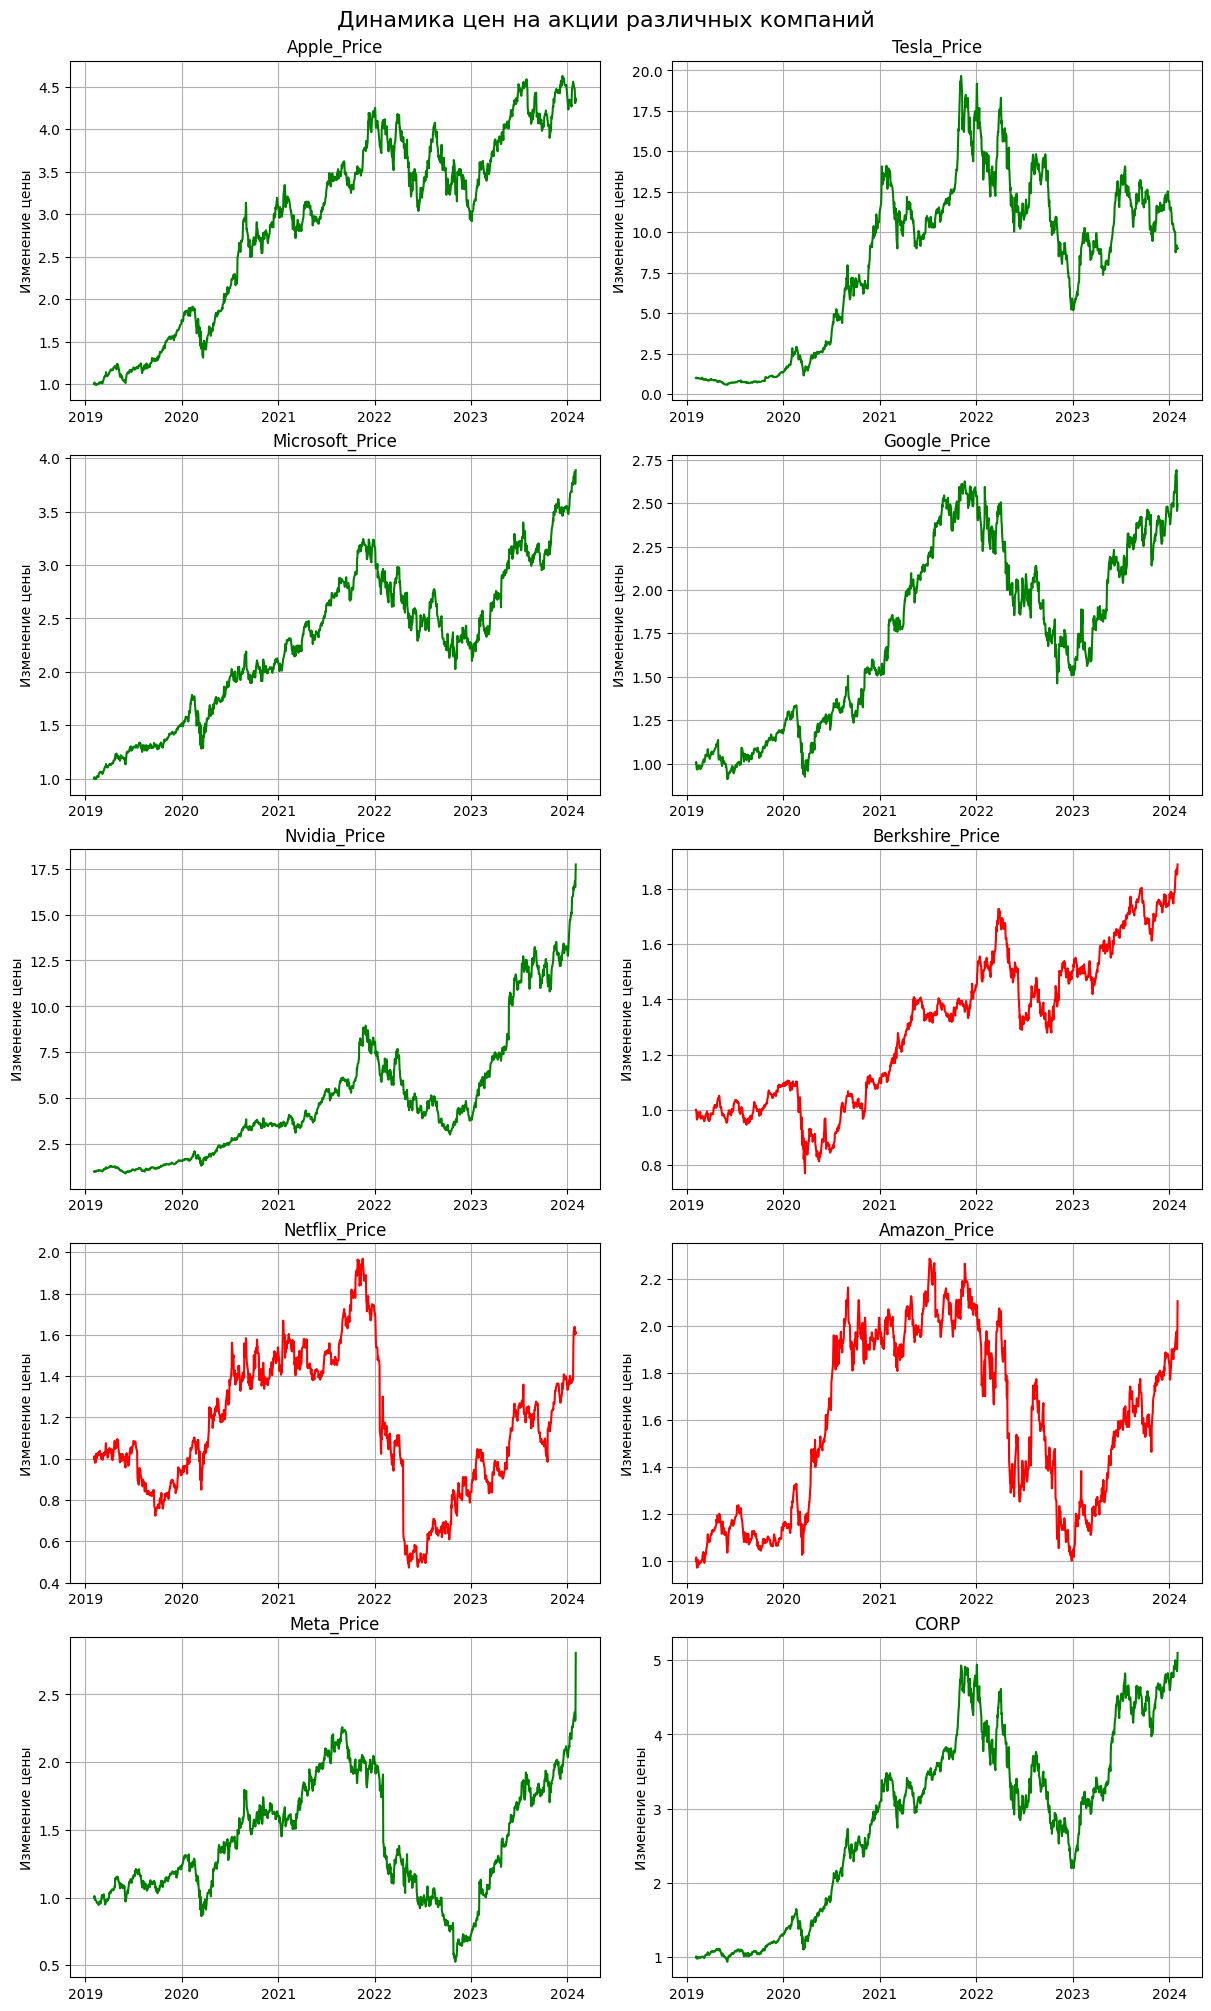

In [20]:
companies.sort_index(inplace=True)
fig, ax = plt.subplots(5, 2, figsize=(12, 20), layout='constrained')
fig.suptitle('Динамика цен на акции различных компаний', fontsize=16)
for i, column in enumerate(companies.columns):
    row = i // 2
    col = i % 2
    if companies.loc['2024-01-02', column] >= 2:
        sns.lineplot(data=companies, x=companies.index, y=column, ax=ax[row,col], color='green')
    else:
        sns.lineplot(data=companies, x=companies.index, y=column, ax=ax[row,col], color='red')
    ax[row,col].grid()    
    ax[row,col].set_title(column)
    ax[row,col].set_xlabel(None)
    ax[row,col].set_ylabel('Изменение цены')
plt.show()

#### Задание 4.2 (2 балла)
С помощью библиотеки plotly создайте lineplot, в котором будет изображена динамика акций компаний за период с 2019 по 2024 гг. Добавьте на график кнопки для каждой компании, нажав на которые можно переключиться между визуализациями динамики изменения стоимости акций для разных компаний. Добавьте название и подписи к осям каждого графика.

In [21]:
import plotly.express as px

fig = px.line(companies, 
              labels={'index': 'Дата', 'value': 'Цена относительно 2019-02-04', 'variable': 'Компании'},
              title='Динамика цен на акции компаний в 2019-2024гг.', 
              height=400, width=1200)
fig.update_layout(xaxis_title='Даты')

fig.show()

### Задание 5 (2 балла)
1) Напишите функцию, которая будет принимать на вход название компании, с помощью этого названия строить scatter plot с зависимостью цены (Price) акций от оборота (Volume) компании.
2) На каждый scatter plot добавьте линию линейной регрессии, которая будет показывать получившуюся зависимость. Получившуюся линию покрасьте в красный цвет.
3) Также на scatter plot добавьте текст с получившимся уравнением (вида  ).
4) Постройте поле (plt.subplots()), в котором будут изображены диаграммы рассеяния для всех компаний, присутствующих в датасете (используйте метод .pipe()). Каждая диаграмма рассеяния должна представлять собой зависимость цен на акции от выручки, иметь линию регрессии, а также текст с регрессионным уравнением для конкретной компании.

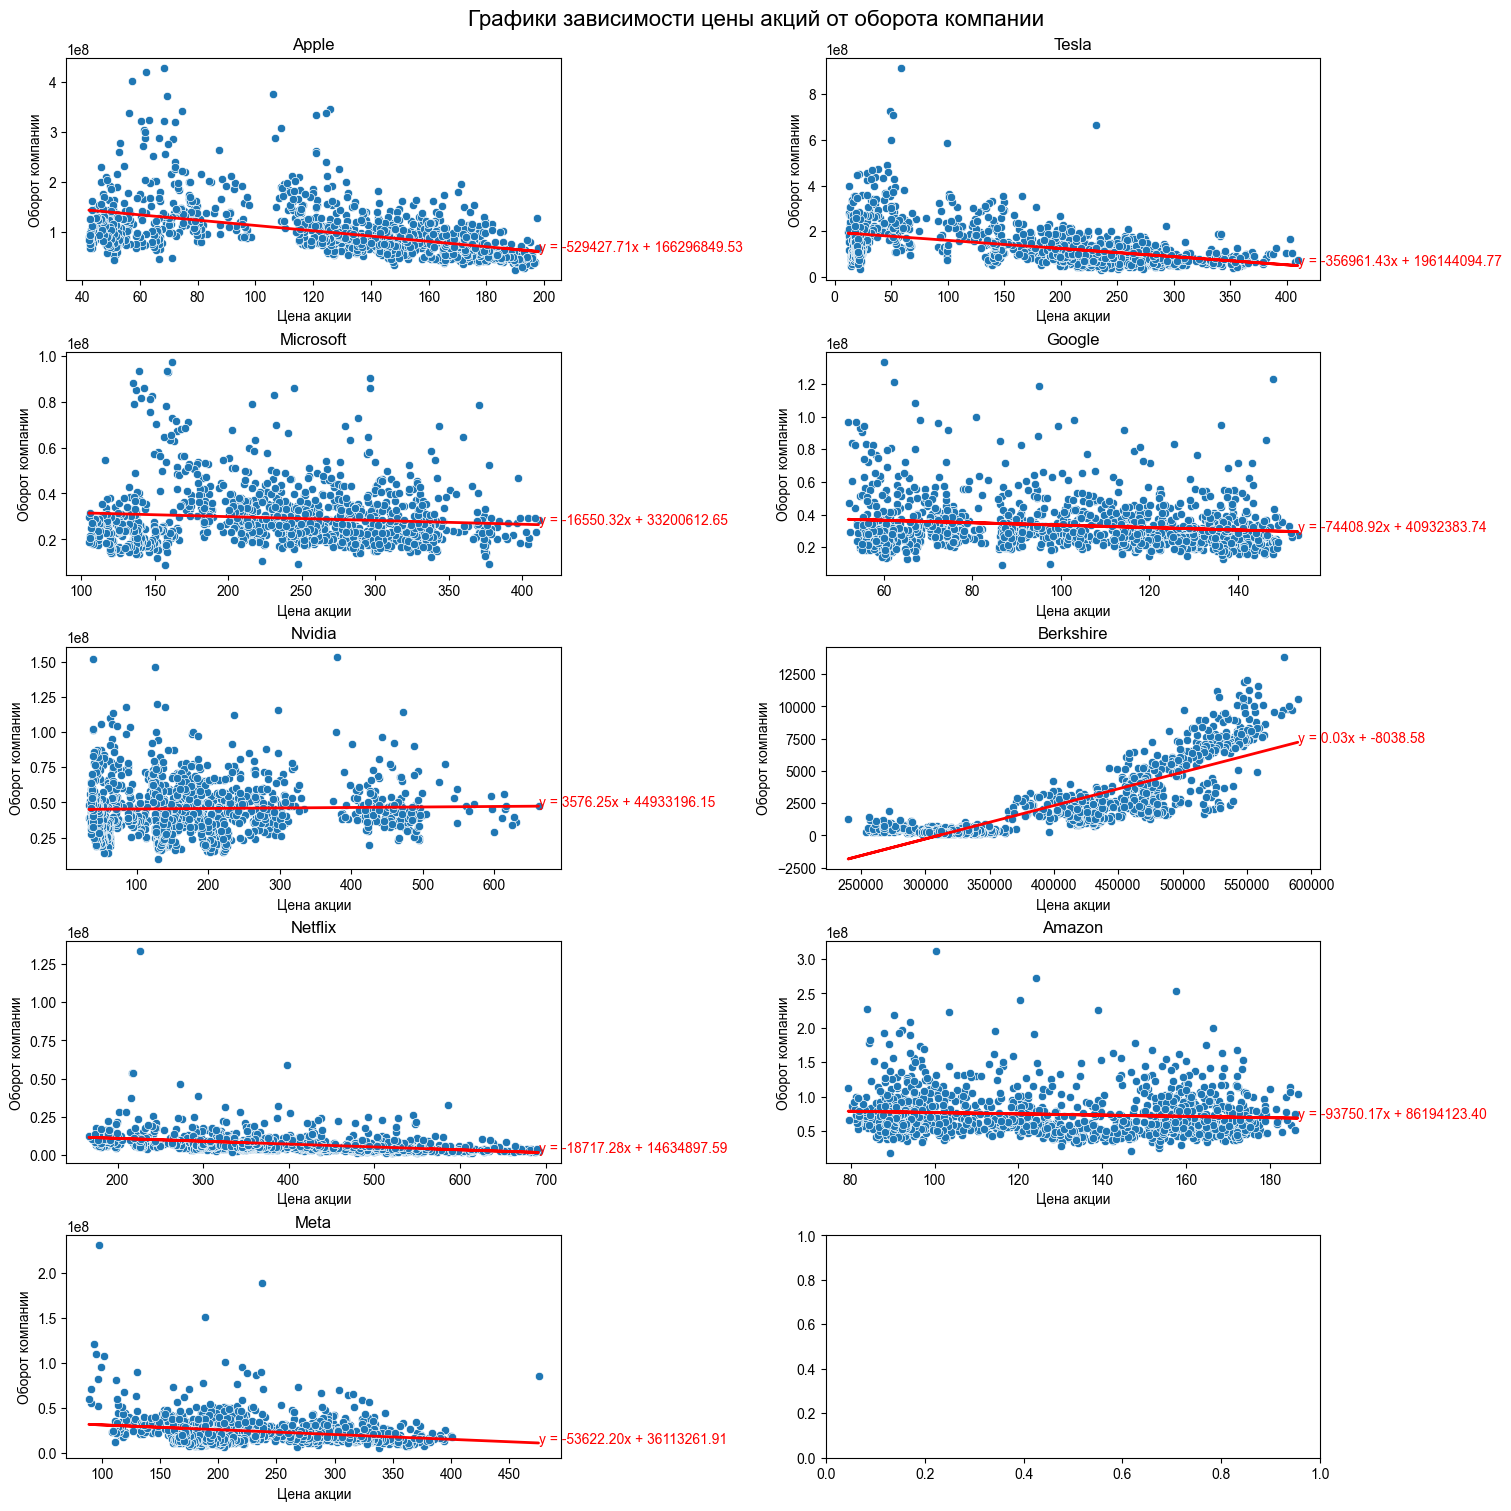

In [22]:
def scatter_plot(company, ax, row, col):
    vol = '_'.join([company, 'Vol.'])
    price = '_'.join([company, 'Price'])
    sns.set(style="whitegrid")
    sns.scatterplot(df, x=price, y=vol, ax=ax[row, col])
    regression_line = np.polyfit(df[price], df[vol], 1)
    slope, intercept = regression_line
    ax[row, col].plot(df[price], slope * df[price] + intercept, color='red', linewidth=2)
    text = f'y = {slope:.2f}x + {intercept:.2f}'
    ax[row, col].text(df[price].max(), slope * df[price].max() + intercept, 
             text, color='red', fontsize=10)
    ax[row, col].set_title(f'{company}')
    ax[row, col].set_xlabel('Цена акции')
    ax[row, col].set_ylabel('Оборот компании')

def draw_subplot(df):
    fig, ax = plt.subplots(5, 2, figsize=(15, 15), layout='constrained')
    fig.suptitle('Графики зависимости цены акций от оборота компании', fontsize=16)
    for i, column in enumerate(df.columns):
        company = str.split(column, '_')[0]
        row = i // 2
        col = i % 2
        scatter_plot(company, ax, row, col)

companies.drop(columns='CORP').pipe(draw_subplot)